# Introduction to the Gillespie Algorithm

## Key Concepts

The Gillespie algorithm simulates the exact time course of a stochastic process without resorting to the approximations required by deterministic methods or the fixed time step limitations of other stochastic simulation techniques. It is particularly useful for systems where the number of entities (such as molecules in a chemical reaction) is small enough that random fluctuations have a significant impact on the system's dynamics.

### Stochastic Processes

In stochastic processes, the next state of the system is not determined solely by its current state but involves a degree of randomness. This contrasts with deterministic processes, where the future state of the system can be predicted exactly from its current state using differential equations.

### Reaction Propensity

The Gillespie algorithm relies on the concept of "propensity," which measures the likelihood of a reaction occurring in a small time interval. For chemical reactions, this is a function of the reaction rate constant and the concentration of the reactants.

### Algorithm Steps

The Gillespie algorithm follows a simple yet powerful sequence of steps to simulate the time evolution of a stochastic system:

1. **Initialization**: Define the initial state of the system, including the numbers of each type of reactant and the total simulation time.

2. **Rate Calculation**: Calculate the propensity of each reaction given the current state of the system.

3. **Time to Next Reaction**: Randomly determine the time to the next reaction using the propensity values, typically through an exponential distribution.

4. **Reaction Selection**: Randomly select which reaction will occur next, weighted by the propensity of each reaction.

5. **State Update**: Update the state of the system to reflect the occurrence of the selected reaction.

6. **Iteration**: Repeat steps 2-5 until the simulation reaches the specified end time or another stopping criterion.


# Mathematical Foundation of the Gillespie Algorithm for Population Growth

The Gillespie algorithm provides a rigorous framework for simulating the stochastic dynamics of population growth. This section dives into the mathematics underpinning the Gillespie algorithm, specifically tailored to model the population growth of a species in a stochastic context.

## Stochastic Processes in Population Dynamics

Population growth can be influenced by stochastic events such as births, deaths, and migration. The Gillespie algorithm models these events as stochastic processes, where the probability of an event occurring within a small time interval is determined by propensity functions.

### Propensity Function in Population Dynamics

For population growth, the propensity function quantifies the likelihood of a birth or death event occurring in a given time interval. If we consider a simple model where the population grows through birth events and decreases through death events, the propensity for each type of event can be defined as follows:

- **Birth Propensity**: Given a birth rate constant $\lambda$, the propensity for a birth event when there are $N$ individuals in the population is $\lambda \cdot N$.
- **Death Propensity**: Similarly, with a death rate constant $\mu$, the propensity for a death event is $\mu \cdot N$.

### Time to Next Event

The time until the next event (either birth or death) occurs is determined by the total propensity of all events, $a_0 = \lambda \cdot N + \mu \cdot N$. The time $\Delta t$ to the next event is sampled from an exponential distribution with parameter $a_0$:

$$ P(\Delta t) = a_0 \exp(-a_0 \Delta t) $$

### Event Selection

With the probabilities of birth and death events defined as $P(\text{birth}) = \frac{\lambda \cdot N}{a_0}$ and $P(\text{death}) = \frac{\mu \cdot N}{a_0}$ respectively, the Gillespie algorithm selects which event occurs next based on these probabilities.

## Algorithm Steps for Population Growth

To simulate population growth, the Gillespie algorithm follows these steps:

1. **Initialization**: Define the initial population size $N$ and set the initial time.
2. **Calculate Propensities**: Compute the birth and death propensities based on the current population size.
3. **Determine $\Delta t$**: Sample the time to the next event from an exponential distribution with mean $1/a_0$.
4. **Select Event**: Choose a birth or death event to occur next, based on their relative probabilities.
5. **Update Population**: Increment or decrement the population size according to the selected event.
6. **Advance Time**: Update the system time by $\Delta t$ and repeat from step 2 until reaching a specified end condition.

This mathematical approach allows the Gillespie algorithm to accurately simulate the inherently stochastic nature of population growth, capturing the random fluctuations that can significantly impact small populations or those subject to variable environmental conditions.


## gillespie simulation for population growth

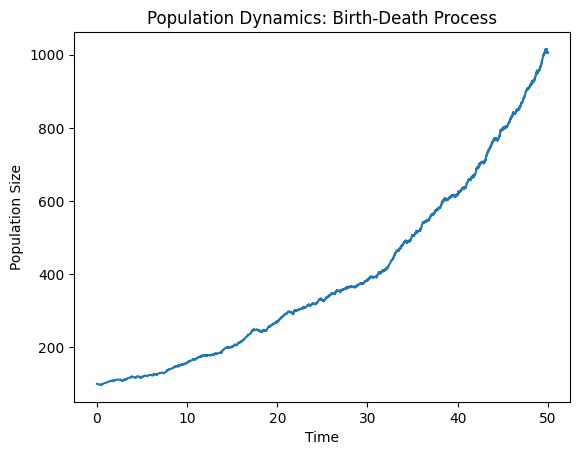

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
birth_rate = 0.1
death_rate = 0.05
initial_population = 100
max_time = 50

# Initialization
population = initial_population
time = 0
times = [time]
populations = [population]

# Gillespie Simulation
while time < max_time:
    if population == 0:
        break  # Extinction

    # Calculate propensities
    birth_propensity = birth_rate * population
    death_propensity = death_rate * population
    total_propensity = birth_propensity + death_propensity

    # Determine time to next event
    time_to_next = np.random.exponential(1 / total_propensity)
    time += time_to_next

    # Determine which event occurs (birth or death)
    if np.random.random() < birth_propensity / total_propensity:
        population += 1  # Birth occurs
    else:
        population -= 1  # Death occurs

    # Record the results
    times.append(time)
    populations.append(population)

# Plotting the results
plt.plot(times, populations)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Population Dynamics: Birth-Death Process')
plt.show()


## 2 species: predator-prey stochastic model

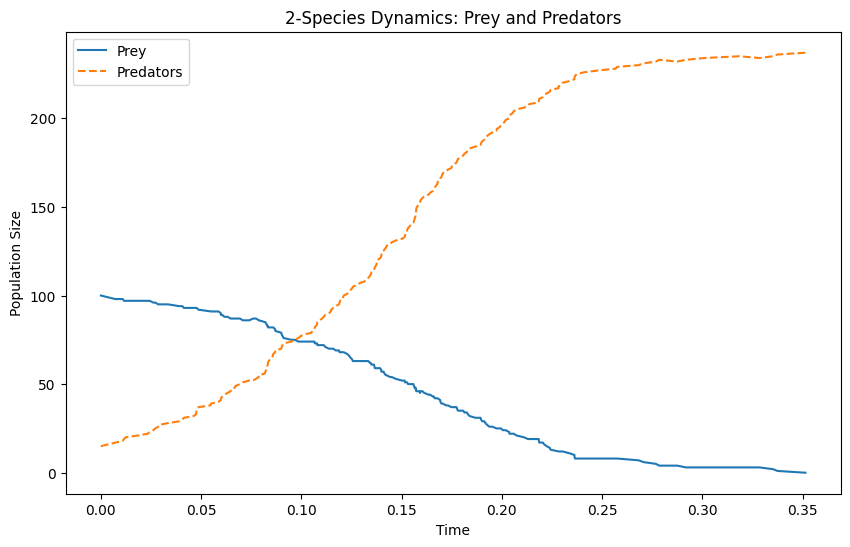

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
prey_birth_rate = 0.1  # Natural birth rate of the prey
predation_rate = 0.1  # Rate at which predators consume prey
predator_birth_rate = 0.1  # Rate at which predators reproduce (proportional to consumed prey)
predator_death_rate = 0.1  # Natural death rate of the predators

# # oscillations:
# prey_birth_rate = 0.05
# predation_rate = 0.0005
# predator_birth_rate = 0.001
# predator_death_rate = 0.1

# Initial populations
initial_prey_population = 100
initial_predator_population = 15

# Initialization
prey_population = initial_prey_population
predator_population = initial_predator_population
time = 0
times = [time]
prey_populations = [prey_population]
predator_populations = [predator_population]

# Gillespie Simulation
max_time = 1000
while time < max_time:
    if prey_population == 0 or predator_population == 0:
        break  # Extinction of either species

    # Calculate propensities
    prey_birth_propensity = prey_birth_rate * prey_population
    predation_propensity = predation_rate * prey_population * predator_population
    predator_birth_propensity = predator_birth_rate * prey_population * predator_population
    predator_death_propensity = predator_death_rate * predator_population
    total_propensity = prey_birth_propensity + predation_propensity + predator_birth_propensity + predator_death_propensity

    # Determine time to next event
    time_to_next = np.random.exponential(1 / total_propensity)
    time += time_to_next

    # Determine which event occurs
    random_value = np.random.random() * total_propensity
    if random_value < prey_birth_propensity:
        prey_population += 1  # Prey birth
    elif random_value < prey_birth_propensity + predation_propensity:
        prey_population -= 1  # Prey death due to predation
        predator_population += 1  # Predator birth as a result of predation
    elif random_value < prey_birth_propensity + predation_propensity + predator_birth_propensity:
        predator_population += 1  # Predator birth independent of predation
    else:
        predator_population -= 1  # Predator death

    # Record the results
    times.append(time)
    prey_populations.append(prey_population)
    predator_populations.append(predator_population)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, prey_populations, label='Prey')
plt.plot(times, predator_populations, label='Predators', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('2-Species Dynamics: Prey and Predators')
plt.legend()
plt.show()


## interactive widget

In [3]:
from IPython.display import display
import ipywidgets as widgets

def run_gillespie_simulation(prey_birth_rate, predation_rate, predator_birth_rate, predator_death_rate, initial_prey_population=100, initial_predator_population=15, max_time=100):
    prey_population = initial_prey_population
    predator_population = initial_predator_population
    time = 0
    times = [time]
    prey_populations = [prey_population]
    predator_populations = [predator_population]

    while time < max_time:
        if prey_population == 0 or predator_population == 0:
            break  # Extinction of either species

        # Calculate propensities
        prey_birth_propensity = prey_birth_rate * prey_population
        predation_propensity = predation_rate * prey_population * predator_population
        predator_birth_propensity = predator_birth_rate * prey_population * predator_population
        predator_death_propensity = predator_death_rate * predator_population
        total_propensity = prey_birth_propensity + predation_propensity + predator_birth_propensity + predator_death_propensity

        # Determine time to next event
        time_to_next = np.random.exponential(1 / total_propensity)
        time += time_to_next

        # Determine which event occurs
        random_value = np.random.random() * total_propensity
        if random_value < prey_birth_propensity:
            prey_population += 1
        elif random_value < prey_birth_propensity + predation_propensity:
            prey_population -= 1
            predator_population += 1
        elif random_value < prey_birth_propensity + predation_propensity + predator_birth_propensity:
            predator_population += 1
        else:
            predator_population -= 1

        times.append(time)
        prey_populations.append(prey_population)
        predator_populations.append(predator_population)

    plt.figure(figsize=(10, 6))
    plt.plot(times, prey_populations, label='Prey')
    plt.plot(times, predator_populations, label='Predators', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('2-Species Dynamics: Prey and Predators')
    plt.legend()
    plt.show()


In [4]:
widgets.interact(run_gillespie_simulation,
                 prey_birth_rate=widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Prey Birth Rate:'),
                 predation_rate=widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Predation Rate:'),
                 predator_birth_rate=widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Predator Birth Rate:'),
                 predator_death_rate=widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Predator Death Rate:'),
                 initial_prey_population=widgets.IntSlider(value=100, min=50, max=500, step=10, description='Initial Prey Population:'),
                 initial_predator_population=widgets.IntSlider(value=15, min=5, max=200, step=5, description='Initial Predator Population:'),
                 max_time=widgets.IntSlider(value=100, min=50, max=1000, step=50, description='Max Time:'))


interactive(children=(FloatSlider(value=0.1, description='Prey Birth Rate:', max=1.0, min=0.01, step=0.01), Fl…

<function __main__.run_gillespie_simulation(prey_birth_rate, predation_rate, predator_birth_rate, predator_death_rate, initial_prey_population=100, initial_predator_population=15, max_time=100)>

## run multiple

In [5]:
def run_multiple_gillespie_simulations(repeats, initial_prey_population, initial_predator_population, prey_birth_rate, predation_rate, predator_birth_rate, predator_death_rate, max_time):
    all_prey_populations = []
    all_predator_populations = []
    all_times = []

    for _ in range(repeats):
        prey_population = initial_prey_population
        predator_population = initial_predator_population
        time = 0
        times = [time]
        prey_populations = [prey_population]
        predator_populations = [predator_population]

        while time < max_time:
            if prey_population == 0 or predator_population == 0:
                times.append(max_time)
                prey_populations.append(prey_population)
                predator_populations.append(predator_population)
                break

            # Calculate propensities
            prey_birth_propensity = prey_birth_rate * prey_population
            predation_propensity = predation_rate * prey_population * predator_population
            predator_birth_propensity = predator_birth_rate * prey_population * predator_population
            predator_death_propensity = predator_death_rate * predator_population
            total_propensity = prey_birth_propensity + predation_propensity + predator_birth_propensity + predator_death_propensity

            # Determine time to next event
            time_to_next = np.random.exponential(1 / total_propensity)
            time += time_to_next

            # Determine which event occurs
            random_value = np.random.random() * total_propensity
            if random_value < prey_birth_propensity:
                prey_population += 1
            elif random_value < prey_birth_propensity + predation_propensity:
                prey_population -= 1
                predator_population += 1
            elif random_value < prey_birth_propensity + predation_propensity + predator_birth_propensity:
                predator_population += 1
            else:
                predator_population -= 1

            # Record the results
            times.append(time)
            prey_populations.append(prey_population)
            predator_populations.append(predator_population)

        all_times.append(times)
        all_prey_populations.append(prey_populations)
        all_predator_populations.append(predator_populations)

    return all_times, all_prey_populations, all_predator_populations

# Plotting function
def plot_simulation_results(all_times, all_prey_populations, all_predator_populations, repeats):
    plt.figure(figsize=(12, 8))

    for i in range(repeats):
        plt.plot(all_times[i], all_prey_populations[i], color='green', alpha=0.5, label='Prey' if i == 0 else "")
        plt.plot(all_times[i], all_predator_populations[i], color='red', alpha=0.5, linestyle='--', label='Predators' if i == 0 else "")

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title(f'Predator-Prey Dynamics over {repeats} Simulations')
    plt.legend()
    plt.show()

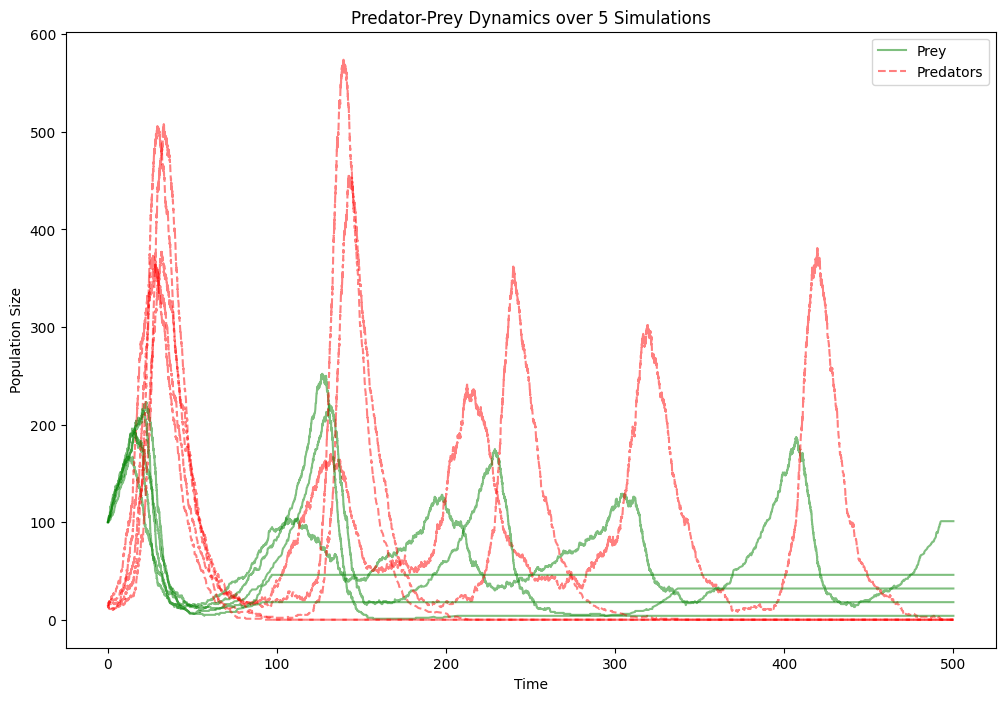

In [6]:
# Example usage
repeats = 5  # Number of simulations to run
initial_prey_population = 100
initial_predator_population = 15

prey_birth_rate = 0.05  # Natural birth rate of the prey
predation_rate = 0.0005  # Rate at which predators consume prey
predator_birth_rate = 0.001  # Rate at which predators reproduce (proportional to consumed prey)
predator_death_rate = 0.1  # Natural death rate of the predators

max_time = 500

all_times, all_prey_populations, all_predator_populations = run_multiple_gillespie_simulations(
    repeats,
    initial_prey_population,
    initial_predator_population,
    prey_birth_rate,
    predation_rate,
    predator_birth_rate,
    predator_death_rate,
    max_time
)

plot_simulation_results(all_times, all_prey_populations, all_predator_populations, repeats)


In [7]:
from scipy.interpolate import interp1d

def plot_average_and_std(all_times, all_prey_populations, all_predator_populations, repeats):
    # Define common time points for interpolation
    common_times = np.linspace(0, max([max(times) for times in all_times]), 500)
    
    interpolated_prey_populations = []
    interpolated_predator_populations = []

    # Interpolate each simulation to the common time points
    for i in range(repeats):
        interp_prey = interp1d(all_times[i], all_prey_populations[i], bounds_error=False, fill_value="extrapolate")
        interpolated_prey_populations.append(interp_prey(common_times))
        
        interp_pred = interp1d(all_times[i], all_predator_populations[i], bounds_error=False, fill_value="extrapolate")
        interpolated_predator_populations.append(interp_pred(common_times))

    # Convert lists to NumPy arrays for easier calculation
    prey_array = np.array(interpolated_prey_populations)
    pred_array = np.array(interpolated_predator_populations)

    # Calculate mean and standard deviation
    prey_mean = np.mean(prey_array, axis=0)
    prey_std = np.std(prey_array, axis=0)
    pred_mean = np.mean(pred_array, axis=0)
    pred_std = np.std(pred_array, axis=0)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot average
    plt.plot(common_times, prey_mean, label='Average Prey', color='green')
    plt.plot(common_times, pred_mean, label='Average Predators', color='red')

    # Plot standard deviation
    plt.fill_between(common_times, prey_mean-prey_std, prey_mean+prey_std, color='green', alpha=0.2)
    plt.fill_between(common_times, pred_mean-pred_std, pred_mean+pred_std, color='red', alpha=0.2)

    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title(f'Average Population Dynamics with Standard Deviation over {repeats} Simulations')
    plt.legend()
    plt.show()

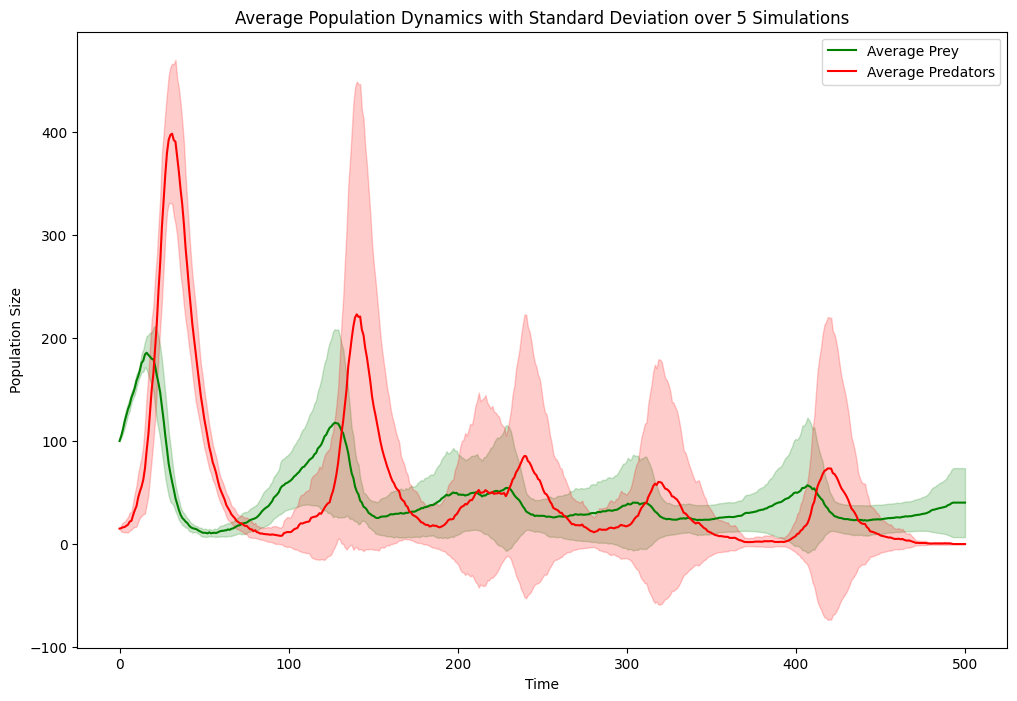

In [8]:
plot_average_and_std(all_times, all_prey_populations, all_predator_populations, repeats)

### interactive widget

In [9]:
def interactive_gillespie_simulation(
    repeats=5, 
    prey_birth_rate=0.05, 
    predation_rate=0.005, 
    predator_birth_rate=0.001, 
    predator_death_rate=0.1, 
    initial_prey_population=100, 
    initial_predator_population=15, 
    max_time=1000, 
    view_mode='Average and Std Dev'
):
    all_times, all_prey_populations, all_predator_populations = run_multiple_gillespie_simulations(
        repeats=repeats,
        initial_prey_population=initial_prey_population,
        initial_predator_population=initial_predator_population,
        prey_birth_rate=prey_birth_rate,
        predation_rate=predation_rate,
        predator_birth_rate=predator_birth_rate,
        predator_death_rate=predator_death_rate,
        max_time=max_time
    )
    
    if view_mode == 'Individual Runs':
        plot_simulation_results(all_times, all_prey_populations, all_predator_populations, repeats)
    else:
        plot_average_and_std(all_times, all_prey_populations, all_predator_populations, repeats)

# # oscillations:
# prey_birth_rate = 0.05
# predation_rate = 0.0005
# predator_birth_rate = 0.001
# predator_death_rate = 0.1

# Creating the widget
slider_layout = widgets.Layout(width='500px')
style = {'description_width': 'initial'}
widgets.interact(interactive_gillespie_simulation,
                 repeats=widgets.IntSlider(min=1, max=20, step=1, value=5, description='Repeats:', style=style, layout=slider_layout),
                 prey_birth_rate=widgets.FloatSlider(min=0.0001, max=0.2, step=0.0001, value=0.05, description='Prey Birth Rate:', readout_format='.4f', style=style, layout=slider_layout),
                 predation_rate=widgets.FloatSlider(min=0.0001, max=0.2, step=0.0001, value=0.0005, description='Predation Rate:', readout_format='.4f', style=style, layout=slider_layout),
                 predator_birth_rate=widgets.FloatSlider(min=0.0001, max=0.2, step=0.0001, value=0.001, description='Predator Birth Rate:', readout_format='.4f', style=style, layout=slider_layout),
                 predator_death_rate=widgets.FloatSlider(min=0.0001, max=0.2, step=0.0001, value=0.1, description='Predator Death Rate:', readout_format='.4f', style=style, layout=slider_layout),
                 initial_prey_population=widgets.IntSlider(min=50, max=500, step=50, value=100, description='Initial Prey Population:', style=style, layout=slider_layout),
                 initial_predator_population=widgets.IntSlider(min=5, max=100, step=5, value=15, description='Initial Predator Population:', style=style, layout=slider_layout),
                 max_time=widgets.IntSlider(min=100, max=2000, step=100, value=1000, description='Max Time:', style=style, layout=slider_layout),
                 view_mode=widgets.RadioButtons(options=['Individual Runs', 'Average and Std Dev'], description='View Mode:', disabled=False, style=style))

interactive(children=(IntSlider(value=5, description='Repeats:', layout=Layout(width='500px'), max=20, min=1, …

<function __main__.interactive_gillespie_simulation(repeats=5, prey_birth_rate=0.05, predation_rate=0.005, predator_birth_rate=0.001, predator_death_rate=0.1, initial_prey_population=100, initial_predator_population=15, max_time=1000, view_mode='Average and Std Dev')>

## generic gillespie simulation

In [10]:
def calculate_total_propensity(propensity_functions, state, parameters):
    """
    Calculate the total propensity and individual propensities for events.
    
    :param propensity_functions: List of functions that calculate propensities.
    :param state: Current state of the system.
    :param parameters: Parameters for the propensity functions.
    :return: Total propensity and list of individual propensities.
    """
    propensities = [func(state, parameters) for func in propensity_functions]
    total_propensity = sum(propensities)
    return total_propensity, propensities

def select_event(propensities, total_propensity):
    """
    Randomly select an event based on propensities.
    
    :param propensities: List of individual propensities for events.
    :param total_propensity: Total propensity of all events.
    :return: Index of the selected event.
    """
    threshold = np.random.random() * total_propensity
    cumulative = 0
    for i, propensity in enumerate(propensities):
        cumulative += propensity
        if cumulative > threshold:
            return i
    return len(propensities) - 1  # Fallback to the last event

def gillespie_step(state, parameters, propensity_functions, update_functions):
    """
    Perform one step of the Gillespie simulation.
    
    :param state: Current state of the system.
    :param parameters: Parameters for the simulation.
    :param propensity_functions: Functions to calculate propensities.
    :param update_functions: Functions to update the state.
    :return: Updated state and time increment.
    """
    total_propensity, propensities = calculate_total_propensity(propensity_functions, state, parameters)
    if total_propensity <= 0:
        return state, 0  # No event can occur

    time_to_next = np.random.exponential(1 / total_propensity)
    event_index = select_event(propensities, total_propensity)
    update_functions[event_index](state, parameters)  # Update the state based on the selected event
    
    return state, time_to_next

def run_gillespie_simulation(initial_state, parameters, propensity_functions, update_functions, max_time):
    """
    Run a Gillespie simulation with specified initial state, parameters, and event functions.
    
    :param initial_state: Initial state of the system.
    :param parameters: Parameters for the simulation.
    :param propensity_functions: List of functions to calculate propensities.
    :param update_functions: List of functions to update the state.
    :param max_time: Maximum time to simulate.
    :return: History of states and times.
    """
    state = initial_state.copy()
    time = 0
    history = [(time, state.copy())]
    
    while time < max_time:
        state, delta_time = gillespie_step(state, parameters, propensity_functions, update_functions)
        if delta_time == 0:
            break  # No further events can occur
        time += delta_time
        history.append((time, state.copy()))
    
    return history

## Application: Simple Birth-Death Population Model

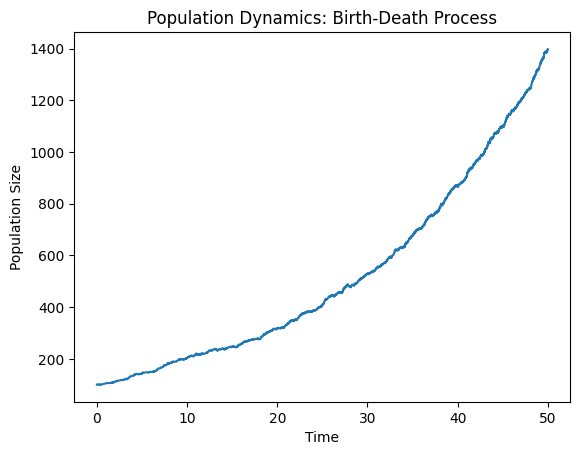

In [11]:
# Propensity functions
def birth_propensity(state, parameters):
    return parameters['birth_rate'] * state['population']

def death_propensity(state, parameters):
    return parameters['death_rate'] * state['population']

# Update functions
def birth_update(state, parameters):
    state['population'] += 1

def death_update(state, parameters):
    state['population'] -= 1

# Initial state and parameters
initial_state = {'population': 100}
parameters = {'birth_rate': 0.1, 'death_rate': 0.05}

# Running the Gillespie simulation
history = run_gillespie_simulation(
    initial_state=initial_state,
    parameters=parameters,
    propensity_functions=[birth_propensity, death_propensity],
    update_functions=[birth_update, death_update],
    max_time=50
)

# Extracting time and population size from the history
times = [entry[0] for entry in history]
populations = [entry[1]['population'] for entry in history]

# Plotting the results
plt.figure()
plt.plot(times, populations)
plt.title('Population Dynamics: Birth-Death Process')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.show()


## Application: predator-prey model

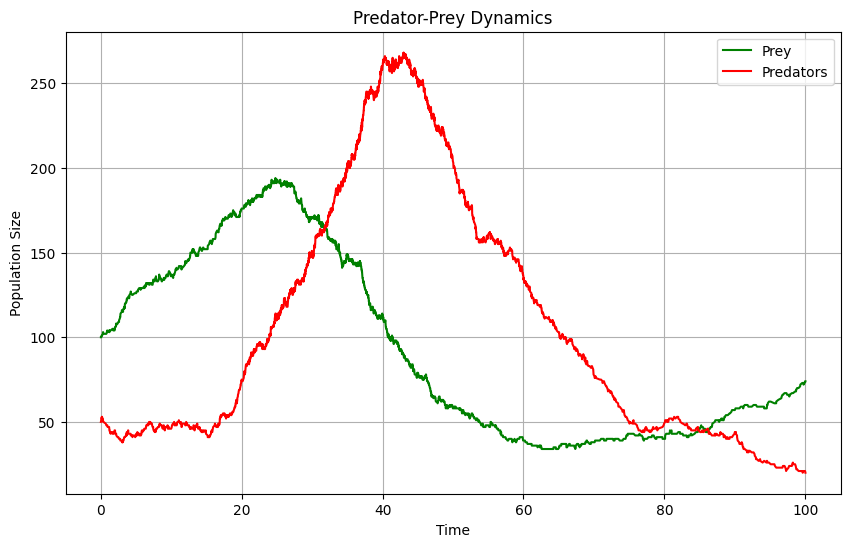

In [12]:
# Propensity functions for the predator-prey model
def prey_birth_propensity(state, parameters):
    return parameters['prey_birth_rate'] * state['prey']

def prey_death_propensity(state, parameters):
    return parameters['predation_rate'] * state['prey'] * state['pred']

def predator_birth_propensity(state, parameters):
    return parameters['predator_birth_rate'] * state['prey'] * state['pred']

def predator_death_propensity(state, parameters):
    return parameters['predator_death_rate'] * state['pred']

# Update functions for the predator-prey model
def prey_birth_update(state, parameters):
    state['prey'] += 1

def prey_death_update(state, parameters):
    state['prey'] -= 1

def predator_birth_update(state, parameters):
    state['pred'] += 1

def predator_death_update(state, parameters):
    state['pred'] -= 1

# Initial state and parameters for the simulation
initial_state = {'prey': 100, 'pred': 50}
parameters = {
    'prey_birth_rate': 0.05,   # Prey birth rate
    'predation_rate': 0.0005,   # Prey death rate due to predation
    'predator_birth_rate': 0.001, # Predator birth rate (proportional to prey consumed)
    'predator_death_rate': 0.1       # Predator natural death rate
}

# Running the Gillespie simulation for predator-prey dynamics
history = run_gillespie_simulation(
    initial_state=initial_state,
    parameters=parameters,
    propensity_functions=[
        prey_birth_propensity, prey_death_propensity,
        predator_birth_propensity, predator_death_propensity
    ],
    update_functions=[
        prey_birth_update, prey_death_update,
        predator_birth_update, predator_death_update
    ],
    max_time=100
)

# Extracting time, prey, and predator populations from the history
times = [entry[0] for entry in history]
prey_populations = [entry[1]['prey'] for entry in history]
pred_populations = [entry[1]['pred'] for entry in history]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, prey_populations, label='Prey', color='green')
plt.plot(times, pred_populations, label='Predators', color='red')
plt.title('Predator-Prey Dynamics')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)
plt.show()
